# Importing needed Libraries and Loading Data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
missing = ['--', 'NA', 'na', '-',' ']
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Modified Data Set.csv", na_values = missing)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0
1,TM195,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0
3,TM195,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0
4,TM195,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0
5,TM195,20.0,Female,14.0,Partnered,3.0,3.0,32973.0,66.0
6,TM195,21.0,Female,14.0,Partnered,3.0,3.0,35247.0,75.0
7,TM195,21.0,Male,13.0,Single,3.0,3.0,32973.0,85.0
8,TM195,21.0,0,15.0,Single,5.0,4.0,35247.0,141.0
9,TM195,21.0,Female,15.0,Partnered,2.0,3.0,37521.0,85.0


# EDA

**Basic Commands to Understand the dataset**

In [ ]:
df.dtypes

Product           object
Age              float64
Gender            object
Education        float64
MaritalStatus     object
Usage            float64
Fitness          float64
Income           float64
Miles            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Age            177 non-null    float64
 2   Gender         180 non-null    object 
 3   Education      178 non-null    float64
 4   MaritalStatus  180 non-null    object 
 5   Usage          179 non-null    float64
 6   Fitness        179 non-null    float64
 7   Income         177 non-null    float64
 8   Miles          177 non-null    float64
dtypes: float64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              3
Gender           0
Education        2
MaritalStatus    0
Usage            1
Fitness          1
Income           3
Miles            3
dtype: int64

There are null values in the dataset.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,177.000000,178.000000,179.000000,179.000000,177.000000,177.000000
mean,28.457627,15.516854,3.424581,3.346369,52931.581921,101.389831
std,6.510451,1.537570,1.037856,0.937739,15532.768033,50.413523
min,18.000000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43206.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,57987.000000,113.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations**

Age lies between 18 and 48 with the mean being approx 29. 

As there is not much difference in mean and median, the skewness in data is minimal

Customers with income range of USD 29,562 to USD 104,581 are using treadmill

Considering the difference between mean and median & mean being greater than median, the data is right skewed

Standard deviation is very high

In [ ]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

TM195 is the most sold model

TM798 is the least sold model

Similar analysis can be done using other fields such as Marital Status and Gender. 

In [ ]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,78.0,28.038462,6.545430,18.0,23.0,26.0,32.0,46.0
Education,80.0,15.037500,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.087500,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,79.0,2.987342,0.630296,2.0,3.0,3.0,3.0,5.0
Income,80.0,46418.025000,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,79.0,81.455696,26.470495,38.0,66.0,85.0,94.0,169.0


Analysis for TM195 is done. 

In [ ]:
df.groupby('Product')['Age'].mean()

Product
TM195    28.038462
TM498    28.576271
TM798    29.100000
Name: Age, dtype: float64

Here analysis is done for Products based on age. 

we group by product based on the age and find the mean out. 

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.318533,0.049475,0.082351,0.546362,0.105951
Education,0.318533,1.000000,0.373385,0.448864,0.619537,0.309626
Usage,0.049475,0.373385,1.000000,0.641668,0.494967,0.750239
Fitness,0.082351,0.448864,0.641668,1.000000,0.536616,0.746846
Income,0.546362,0.619537,0.494967,0.536616,1.000000,0.594053
Miles,0.105951,0.309626,0.750239,0.746846,0.594053,1.000000


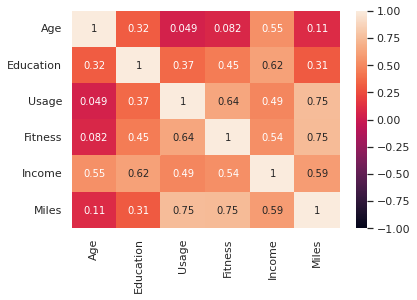

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1) 
plt.show()


From the above snippets of code we derive the correlation between all the numerical columns

we observe that the following attributes show respective correlation amoung them:

Fitness and Miles  - High

Miles and Usage - High

Income and Usage - Low

Age and Usage - Low



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


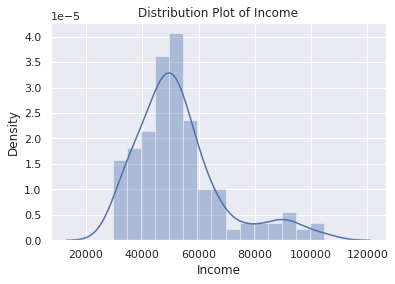

In [ ]:
sns.distplot(df.Income)
plt.title("Distribution Plot of Income")
plt.show()

**Skewdness:**

In [ ]:
df.skew(axis = 0, skipna = True)

Age          0.894368
Education    0.453642
Usage        0.630607
Fitness      0.578171
Income       1.315024
Miles        1.861480
dtype: float64

In [ ]:
products = np.unique(df['Product'], return_counts=True)
print('products = {}\n'.format(products))

products = (array(['TM195', 'TM498', 'TM798'], dtype=object), array([80, 60, 40]))



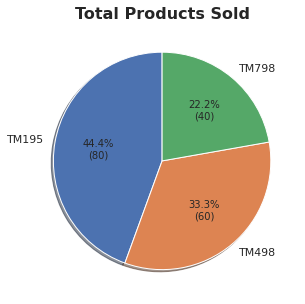

In [ ]:
def spec(x):
    return '{:.1f}%\n({:.0f})'.format(x, np.sum(products[1])*x/100);

#create pie chart of products sold
fig = plt.figure(figsize=[5,5]);
patches, texts, autotexts = plt.pie(list(products[1]),labels=list(products[0]), autopct=spec, shadow=True, startangle=90);

plt.title('Total Products Sold', fontsize=16, fontweight='bold');

**Hypotheses**

Age and Product can be related .


Different Genders may prefer different product.


Fit people may have different product preference based on the features offered. 


Most Sold product and logical reasons behind it. 


We see that not many features are linearly related, so linear regression would not give us a good result for predictive analysis. 

Moreover, predictive analysis could be done better using decision tree since many of the features of this dataset are yes/no (binary) attributes. 


From this entire notebook, we come to understand the importance of data and how it could solve real-world business problems. 



# Preprocessing

### Understand The Structure Of Data

***projecting the first 5 rows of the data***

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0
1,TM195,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0
3,TM195,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0
4,TM195,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0


***projecting the last 5 rows of the data***

In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40.0,Male,21.0,Single,6.0,5.0,83416.0,200.0
176,TM798,42.0,Male,18.0,Single,5.0,4.0,89641.0,200.0
177,TM798,45.0,Male,16.0,Single,5.0,5.0,NaN,160.0
178,TM798,47.0,Male,18.0,Partnered,4.0,5.0,104581.0,120.0
179,TM798,48.0,Male,18.0,Partnered,4.0,5.0,95508.0,180.0


***Checking the object / data types of data in dataframe***

In [ ]:
df.dtypes

Product           object
Age              float64
Gender            object
Education        float64
MaritalStatus     object
Usage            float64
Fitness          float64
Income           float64
Miles            float64
dtype: object

***Checking the size of data***

In [ ]:
df.shape

(180, 9)

***Checking additional information on the dataframe***

In [ ]:
df.info

<bound method DataFrame.info of     Product   Age  Gender  Education  ... Usage  Fitness    Income  Miles
0     TM195  18.0    Male       14.0  ...   3.0      4.0   29562.0  112.0
1     TM195  19.0    Male       15.0  ...   2.0      3.0   31836.0   75.0
2     TM195  19.0  Female       14.0  ...   4.0      3.0   30699.0   66.0
3     TM195  19.0    Male       12.0  ...   3.0      3.0   32973.0   85.0
4     TM195  20.0    Male       13.0  ...   4.0      2.0   35247.0   47.0
..      ...   ...     ...        ...  ...   ...      ...       ...    ...
175   TM798  40.0    Male       21.0  ...   6.0      5.0   83416.0  200.0
176   TM798  42.0    Male       18.0  ...   5.0      4.0   89641.0  200.0
177   TM798  45.0    Male       16.0  ...   5.0      5.0       NaN  160.0
178   TM798  47.0    Male       18.0  ...   4.0      5.0  104581.0  120.0
179   TM798  48.0    Male       18.0  ...   4.0      5.0   95508.0  180.0

[180 rows x 9 columns]>

***Identifying the column names in dataset***

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### **Missing Values**

***Identifying the missing values in dataset***

***Observation : There are missing values in the dataset***

In [ ]:
df.isnull().sum()

Product          0
Age              3
Gender           0
Education        2
MaritalStatus    0
Usage            1
Fitness          1
Income           3
Miles            3
dtype: int64

***Identify the duplicate records***

***Observations: There are no duplicate values in the dataset***

In [ ]:
df.duplicated().sum()

0

***Describing the numerical columns in the dataset***

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,177.000000,178.000000,179.000000,179.000000,177.000000,177.000000
mean,28.457627,15.516854,3.424581,3.346369,52931.581921,101.389831
std,6.510451,1.537570,1.037856,0.937739,15532.768033,50.413523
min,18.000000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43206.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,57987.000000,113.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


***Count based on model***

In [ ]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

***Count based on Gender***

***Observations: There are 76 female Customers & There are 104 male Customers***

In [ ]:
df.Gender.value_counts()

Male      103
Female     76
0           1
Name: Gender, dtype: int64

***changing it to  object dtype to category  to save memory***

In [ ]:
df.Product=df["Product"].astype("category")
df.Gender=df["Gender"].astype("category")
df.MaritalStatus=df["MaritalStatus"].astype("category")

In [ ]:
df.dtypes

Product          category
Age               float64
Gender           category
Education         float64
MaritalStatus    category
Usage             float64
Fitness           float64
Income            float64
Miles             float64
dtype: object

In [ ]:
pd.crosstab(df['Fitness'], df['Product'])

Product,TM195,TM498,TM798
Fitness,,,
2.0,14,12,0
3.0,54,39,4
4.0,9,8,7
5.0,2,1,29


### **Mean**

***Calculating mean for coloumn Education***

In [ ]:
df['Education'].mean()

15.51685393258427

### **Median**

***Calculating median for coloumn Education***

In [ ]:
df['Education'].median()

16.0

### **Percentile**

***Calculating quartile entire dataframe at .1, .3, .63, .95***

In [ ]:
df.quantile([.1, .3, .63, .95], axis = 0)

,Age,Education,Usage,Fitness,Income,Miles
0.10,22.0,14.0,2.0,2.0,35247.0,53.0
0.30,24.0,14.0,3.0,3.0,45480.0,75.0
0.63,29.0,16.0,4.0,3.0,53439.0,100.0
0.95,40.2,18.0,5.0,5.0,89641.0,185.2


***Filtering The Male Gender***

In [ ]:
df[df['Gender']=='Male']

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0
1,TM195,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
3,TM195,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0
4,TM195,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0
7,TM195,21.0,Male,13.0,Single,3.0,3.0,32973.0,85.0
...,...,...,...,...,...,...,...,...,...
175,TM798,40.0,Male,21.0,Single,6.0,5.0,83416.0,200.0
176,TM798,42.0,Male,18.0,Single,5.0,4.0,89641.0,200.0
177,TM798,45.0,Male,16.0,Single,5.0,5.0,NaN,160.0
178,TM798,47.0,Male,18.0,Partnered,4.0,5.0,104581.0,120.0


***One row, range of columns***

In [ ]:
df.iloc[:, 0:2]

,Product,Age
0,TM195,18.0
1,TM195,19.0
2,TM195,19.0
3,TM195,19.0
4,TM195,20.0
...,...,...
175,TM798,40.0
176,TM798,42.0
177,TM798,45.0
178,TM798,47.0


### Oulier and Missing Values Removal

In [ ]:
df.isnull().sum()

Product          0
Age              3
Gender           0
Education        2
MaritalStatus    0
Usage            1
Fitness          1
Income           3
Miles            3
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(df['Gender']).reshape(-1, 1))
val = pd.DataFrame(val)
df['Gender'] = val[0]

In [ ]:
val = imputer.fit_transform(np.array(df['MaritalStatus']).reshape(-1, 1))
val = pd.DataFrame(val)
df['MaritalStatus'] = val[0]
df.isnull().sum()

Product          0
Age              3
Gender           0
Education        2
MaritalStatus    0
Usage            1
Fitness          1
Income           3
Miles            3
dtype: int64

**checking for words in numerical column**

In [ ]:
k = np.array(df.select_dtypes(include = 'number').columns)
#print(k)

for i in k:
  df[i] = df[i].replace(r'^[A-Za-z]+', np.nan, regex = True)
  #print(i)

**Observations**
*   Numerical column having string or character as data is replaced with NaN.

**checking for numbers in categorical column**


In [ ]:
k = np.array(df.select_dtypes(include = 'object').columns)
#print(k)
 
for i in k:
  df[i] = df[i].replace(r'^[0-9]+', np.nan, regex = True)
  #print(i)
 
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0
1,TM195,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0
3,TM195,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0
4,TM195,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0
5,TM195,20.0,Female,14.0,Partnered,3.0,3.0,32973.0,66.0
6,TM195,21.0,Female,14.0,Partnered,3.0,3.0,35247.0,75.0
7,TM195,21.0,Male,13.0,Single,3.0,3.0,32973.0,85.0
8,TM195,21.0,NaN,15.0,Single,5.0,4.0,35247.0,141.0
9,TM195,21.0,Female,15.0,Partnered,2.0,3.0,37521.0,85.0


**Observations**
*   We can see that categorical column having number as data is replaced with NaN.
*   For instance, Gender column at row index 8 is replaced with NaN.



In [ ]:
df.isnull().sum()

Product          0
Age              3
Gender           1
Education        2
MaritalStatus    1
Usage            1
Fitness          1
Income           3
Miles            3
dtype: int64

**Treating missing values**

In [ ]:
val = df.select_dtypes(include = 'number')
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
trans = imputer.fit_transform(val)
dataset = pd.DataFrame(trans)

j=0
for i in val.columns:
  df[i] = dataset[j]
  j+=1

'''
df.fillna(df.median(), inplace= True)
df.isnull().sum()
'''
df.isnull().sum()

Product          0
Age              0
Gender           1
Education        0
MaritalStatus    1
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
*   We can see that the null values in numerical columns are replaced with median of each column.
*   Only categorical column has null values (**Gender and MaritalStatus**).

In [ ]:
'''
Objval = df.select_dtypes(include = 'object')
Objval = Objval.fillna(Objval.mode().iloc[0])
Objval = pd.DataFrame(Objval)

for i in Objval.columns:
  df[i] = Objval[i]

#df.head(30)
df.isnull().sum()
'''

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(df['Gender']).reshape(-1, 1))

val = pd.DataFrame(val)
df['Gender'] = val[0]

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    1
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
*   We can see that the null values in Gender column is replced with most occuring class.
*   Only **MaritalStatus** column has null values.

In [ ]:
val = imputer.fit_transform(np.array(df['MaritalStatus']).reshape(-1, 1))

val = pd.DataFrame(val)
df['MaritalStatus'] = val[0]

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
*   We can see that the null values in MaritalStatus column is replced with most occuring class.
*   **Zero null values** in the dataset.

**Treating OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

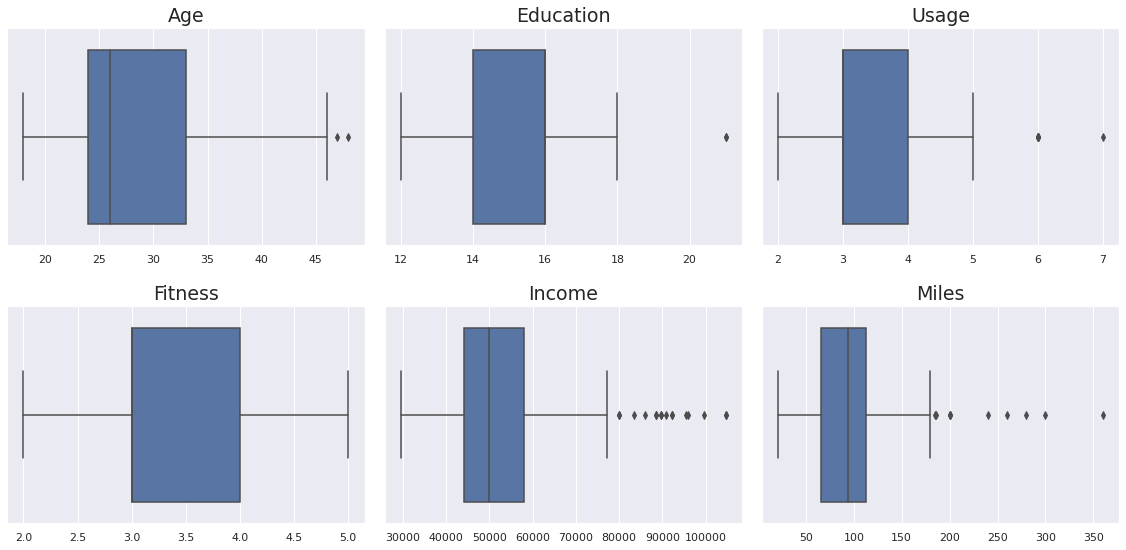

In [ ]:
in_df = df.select_dtypes('float')
fig, ax = plt.subplots(2,3, figsize=(16, 8))
ax = ax.flatten()
for i in range(6):
    sns.boxplot(in_df.iloc[:,i].values, ax=ax[i])
    ax[i].set_title(in_df.columns[i], size=19)
fig.tight_layout(pad=2.0)

**Observation**
* Age: it has 2-3 values which exceed the IQR and our boxplots are considering them as outlier.
* Education : it has two values while others are ranging 12 to 18
* Fitness has one outlier which doesnot have fitness value
* Income : as expected income has lot of outliers in it. income generally most of people has same in a organization & few has great fancy incomes.
* Miles : has outliers too, means few people really push themself.

In [ ]:
val = df.select_dtypes(include = 'number')

Q1 = val.quantile(0.25)
Q3 = val.quantile(0.75)
IQR = Q3 - Q1

l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

my = val.values
index = val.index
kamal = index[[np.where( (val > u) | (val < l) )]]
#print(kamal[0].shape)

print(index[[np.where( (val > u) | (val < l) )]])


[[148 152 155 155 157 160 162 162 164 164 166 166 166 167 167 167 168 169
  170 170 170 171 171 172 173 173 174 175 175 175 175 176 176 178 178 179
  179]
 [  5   5   2   5   1   4   2   4   2   4   2   4   5   2   4   5   4   4
    2   4   5   4   5   4   4   5   4   1   2   4   5   4   5   0   4   0
    4]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

In [ ]:
print(l)
print(u)

Age             10.500
Education       11.000
Usage            1.500
Fitness          1.500
Income       23166.375
Miles           -4.500
dtype: float64
Age             46.500
Education       19.000
Usage            5.500
Fitness          5.500
Income       78879.375
Miles          183.500
dtype: float64


**Observations**
*   **Outliers are present**
*   we can see the row and column index of cells that has value greater than upper_bound or less than lower_bound.

In [ ]:
df.drop(kamal[0], axis =0, inplace = True)
df.shape

(160, 9)

**Observations**
*   Rows with outliers are dropped using row index


In [ ]:
val = df.select_dtypes(include = 'number')
print(index[[np.where( (val > u) | (val < l) )]])

[]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


**Observations**
*   The array is empty, hence **no outliers**

# Visualisation 

## Numerical Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe019b43290>,
      dtype=object)

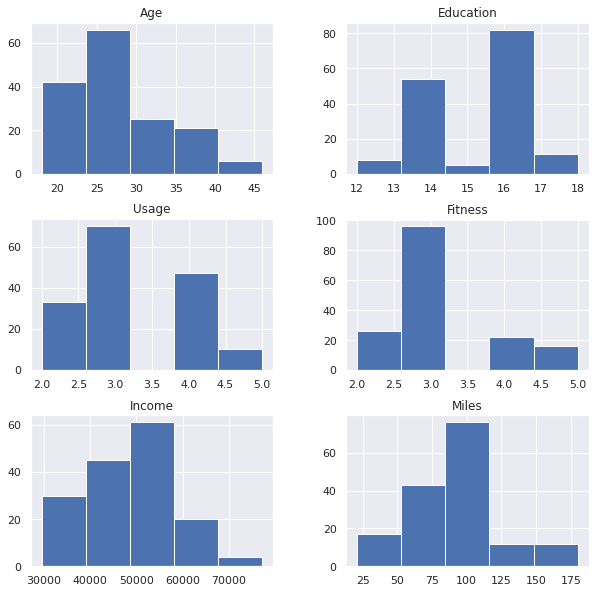

In [ ]:
df.hist(figsize=(10,10),bins=5)

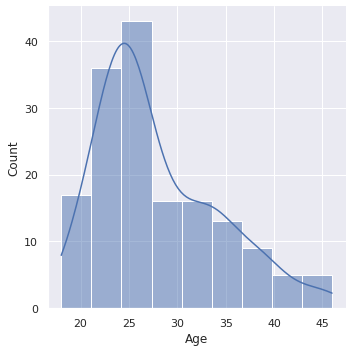

In [ ]:
sns.displot(x=df.Age,kde=True)



**Observation**
*   Most of the customers (75%) are below or equal the age of 30, data is right skewed.



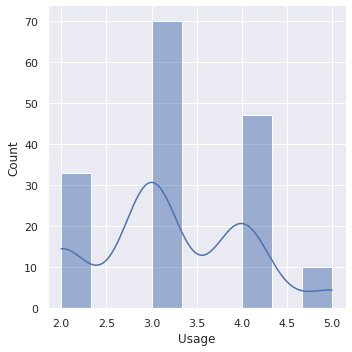

In [ ]:
sns.displot(x=df.Usage,kde=True)

**Observation**



*   Most of the customers plan to use the fitness devices 3 to 4 times a week, data is right skewed.




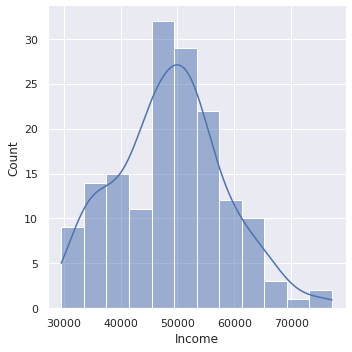

In [ ]:
sns.displot(x=df.Income,kde=True)

**Observation**



*   It's almost close to normal distribution 



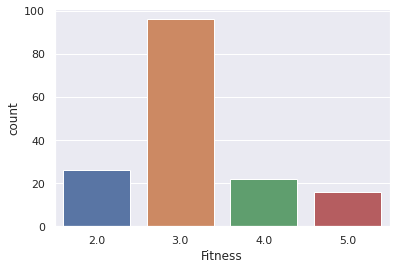

In [ ]:
sns.countplot(x=df.Fitness)

**Observation**

*   The majority of the customers self rated fitness is 3 for more than 95 customers



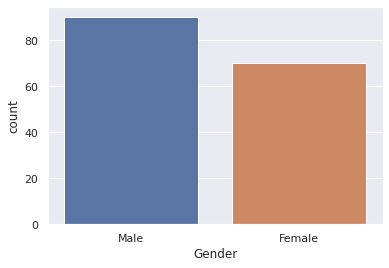

In [ ]:
sns.countplot(x=df.Gender)

**Oservation**

*   Customer males count is exceeding the female customers


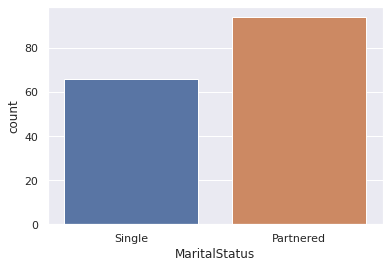

In [ ]:
sns.countplot(x=df.MaritalStatus)

**Observation**

*   Most of the customers are partnered (more than 100).


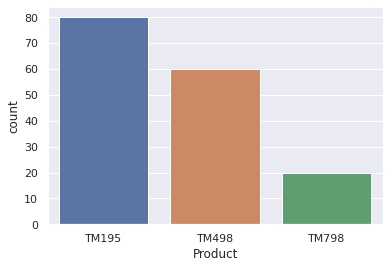

In [ ]:
sns.countplot(x=df.Product)

**Observation**

*   The most sold product is the TM195, followed by TM498 and TM798 respectively.



**Analysis Based On Miles planned per week**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


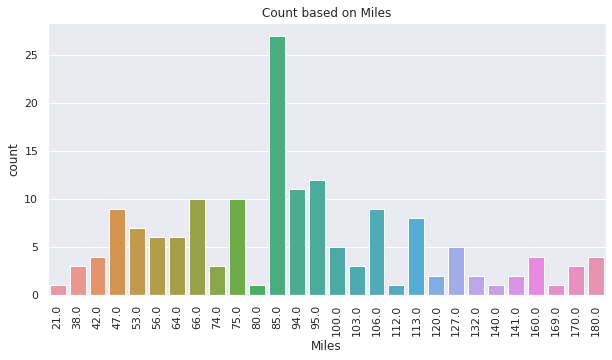

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df.Miles)
plt.title('Count based on Miles')
plt.xticks(rotation=90)
plt.show()


**Observation**
* Most customers run 85 miles per week

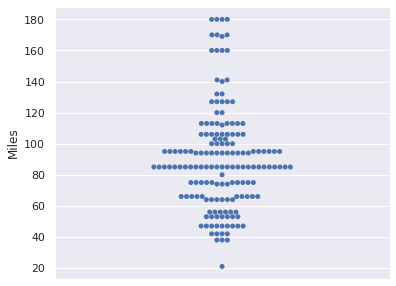

In [ ]:
plt.figure(figsize=(6,5)) 
sns.swarmplot(y=df.Miles)

**Observation**

*   The expected miles to run for most customers are below 130





**Analysis of Miles based on Gender**

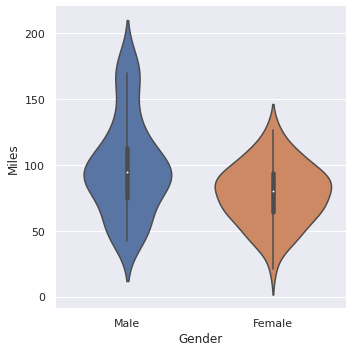

In [ ]:
sns.catplot(x='Gender',y='Miles',data=df, kind='violin')
plt.show()

**Observation**
* Density of male is high at 95 miles but it is high aat nearly 75 miles in case of females

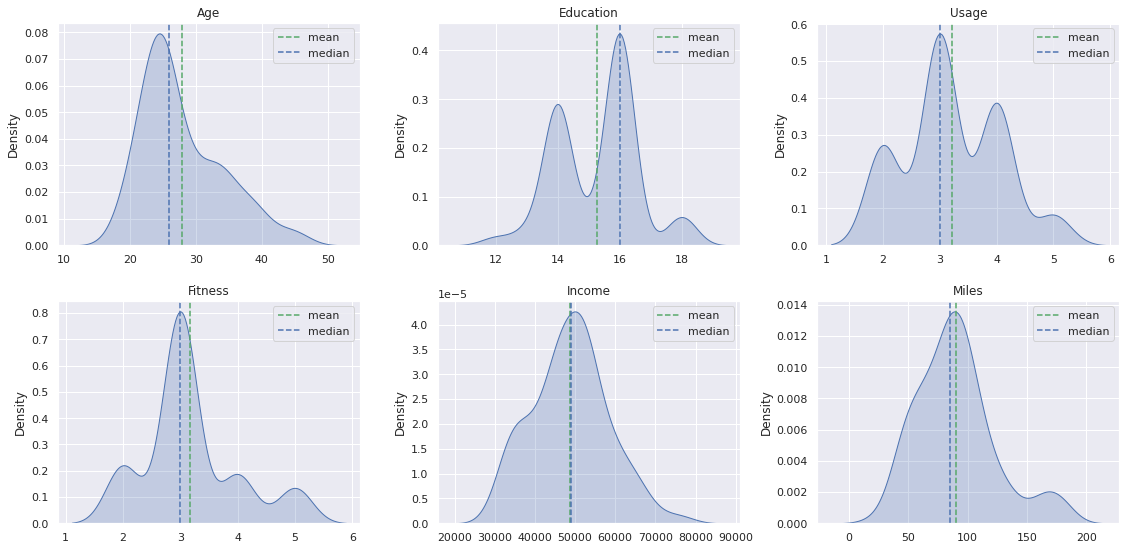

In [ ]:
in_df = df.select_dtypes('float')
fig, ax = plt.subplots(2,3, figsize=(16, 8))
ax = ax.flatten()
for i in range(6):
    mean = in_df.iloc[:,i].mean()
    median = np.median(in_df.iloc[:,i])
    sns.kdeplot(in_df.iloc[:,i].values, ax=ax[i], shade=True)
    ax[i].axvline(mean, color='g', linestyle='--', label='mean')
    ax[i].axvline(median, color='b', linestyle='--', label='median')
    ax[i].set_title(in_df.columns[i])
    ax[i].legend()
fig.tight_layout(pad=2.0)

**Observation**

1.**Age**
* We can see the age is right skewed. 
* Age is ranging from 16 to 50.
* From figure it is clear the median is at 26 around and mean is near 29, so there must be outlier(or maybe not)i.e. there must be value which is so large that it pulling whole graph to it self and it is skewed. 

2.**Education**
* Not highly skewed. 
* ranging from 12-22 
* mean is higher than median looks like slightly left skewed but not much( not need to deal or pay attention)

All other 4 are not showing much of difference, range is already mentioned and some graphs shows little modes near but no need to worry since we are just exploring the data here.

**Pairplot of all numerical values with classification of Product**

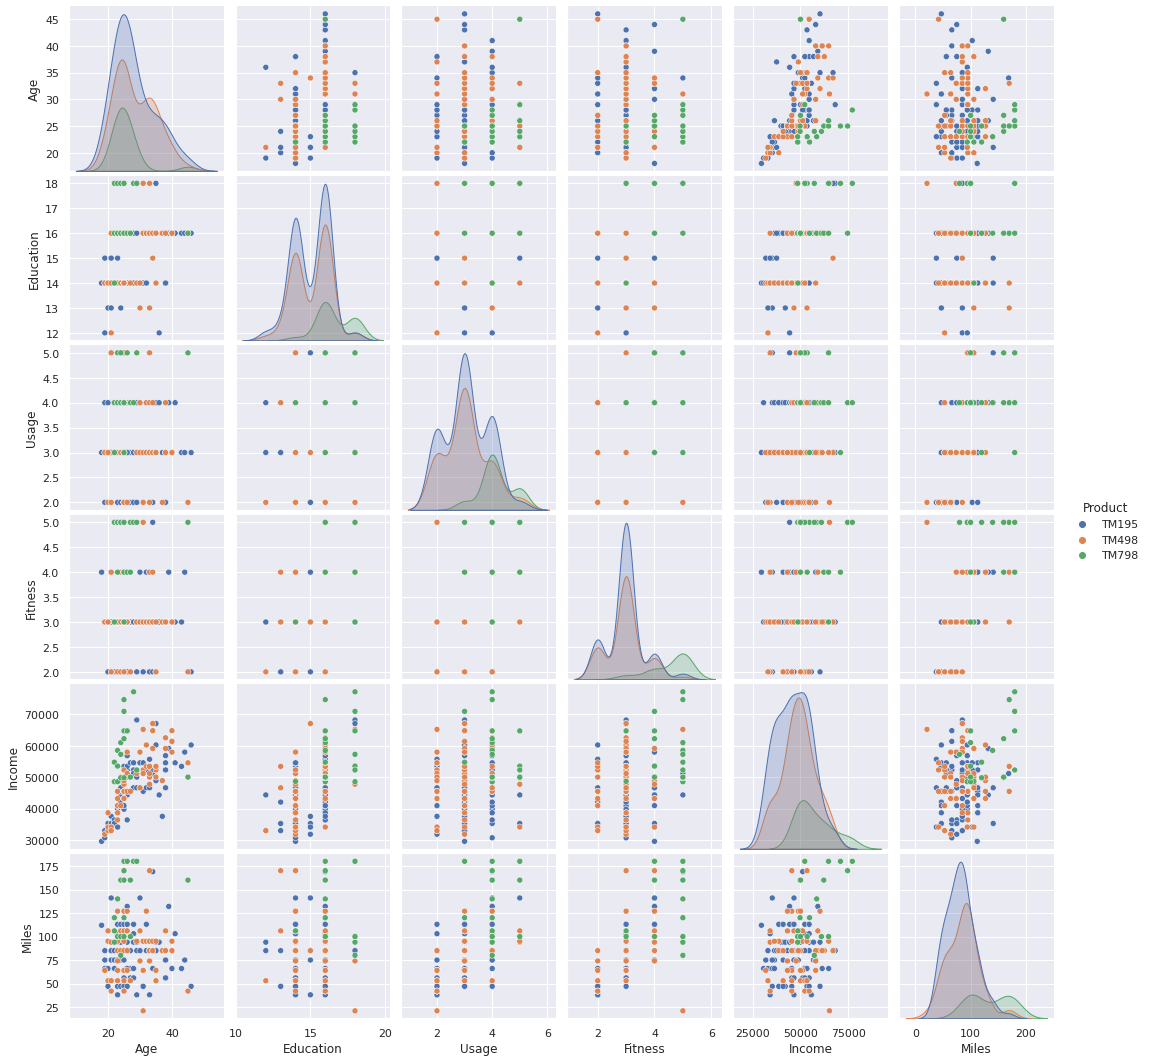

In [ ]:
sns.pairplot(df, hue='Product')
plt.show()

**Observation**

* Age and income has kind of linear relationship.
* Income and miles also share the linear relationship
* As miles is increasing ussage increase(which is obvious)
* Fitness increases as mile increases
* Age and miles also has linear relationship but as it increases the values has variations in it.
* Ussage and income : those having less income has high ussage.

## Categorical Data Analysis

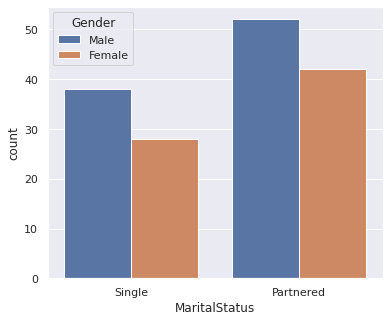

In [ ]:
plt.figure(figsize=(6,5)) 
sns.countplot(x="MaritalStatus",data=df,hue="Gender")

**Observation**

* The number of partnered customers exceeds the single ones, with an increase in Males.
* Male singles exceeds female ones as well.


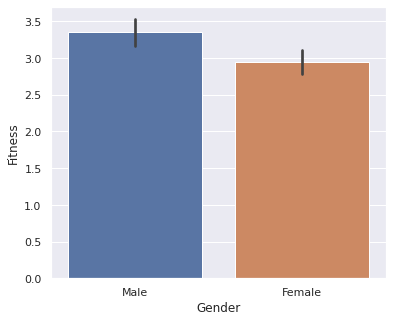

In [ ]:
plt.figure(figsize=(6,5)) 
sns.barplot(x="Gender", y="Fitness",data=df)

**Observation**
* Fitness average is higher in males.

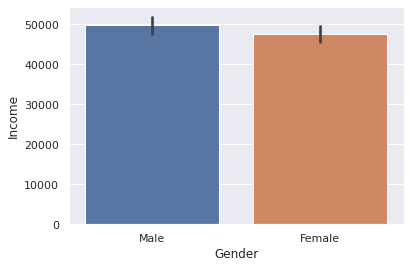

In [ ]:
sns.barplot(x="Gender", y="Income",data=df)

**Observation**
* Males are having a slightly higher Income average, may be because males are more in the data

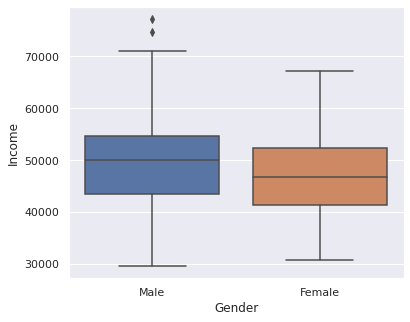

In [ ]:
plt.figure(figsize=(6,5)) 
sns.boxplot(x="Gender", y="Income",data=df)

**Observation**
* Male customers income are higher than female customers with an average around 50K, with  outliers above 70k
* Female customers average income is around 46K


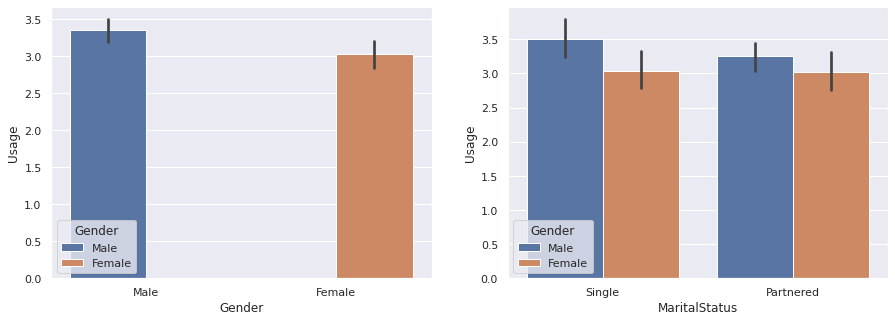

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
sns.barplot(x="Gender", y="Usage",data=df,hue="Gender",ax=axes[0])
sns.barplot(x="MaritalStatus", y="Usage",data=df,hue="Gender",ax=axes[1])

**Observation**
* In general males tend to use the fitness devices more than females no matter they are partnered or not

## Product VS Other Variables Analysis

**Product vs gender counts**

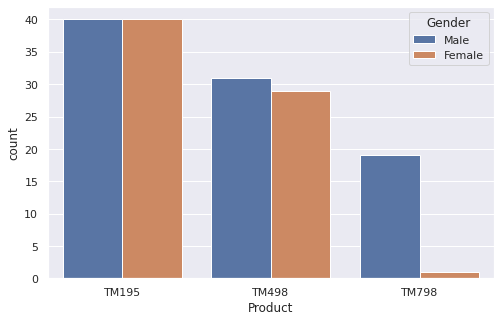

In [ ]:
plt.figure(figsize=(8,5)) 
sns.countplot(x="Product",data=df,hue="Gender")

**Observation**
* Product TM195 female customers and male customers are almost equal
* Product TM498 males a slightly more than females
* Product TM798 male customers are significantly more than female customers
* The most sold product is the TM195 (80 devices)

**Product vs Usage**

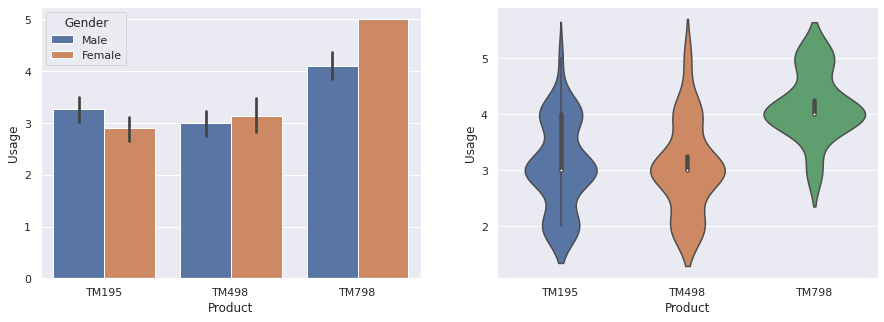

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
sns.barplot(x="Product", y="Usage", data=df,hue="Gender",ax=axes[0])
sns.violinplot(y="Usage", x="Product",data=df,ax=axes[1])

**Observation**
* The plots shows that the average planned usage for people using TM195 and TM498 is around 3 times a week, however customers using TM798 planned usgae is 4 to 5 times a week.

**Product vs Marital Status**

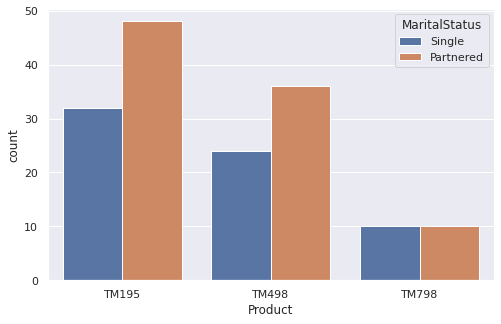

In [ ]:
plt.figure(figsize=(8,5)) 
sns.countplot(x="Product",data=df,hue="MaritalStatus")

**Observation**
* In general partnered customers buy fitness devices more that single ones
* In order the highest sold devices are TM195, then TM498, then TM798

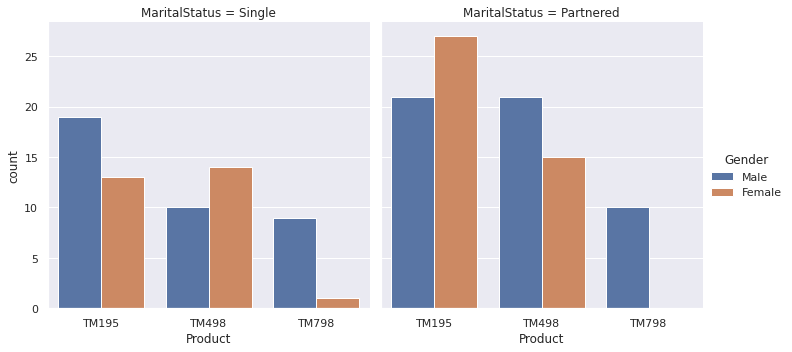

In [ ]:
sns.catplot(x="Product",col="MaritalStatus",data=df,kind="count",hue="Gender")

**Observation**
* Product TM195 is bought more by female partnered customers, but in single customers males bought more.
* Product TM498 is bought more by male partnered customers, but in single customers female bought more.
* Product TM798 is bought mainly by single and partnered males.

**Product vs Customer Age**

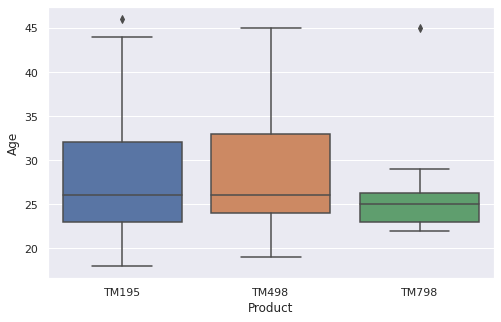

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Product", y="Age",data=df)

**Observation**
* Customers of products TM195 and TM498 are very similar in terms of age, although customers of TM798 are fewer, most of them are younger

**Product vs Customer Fitness**

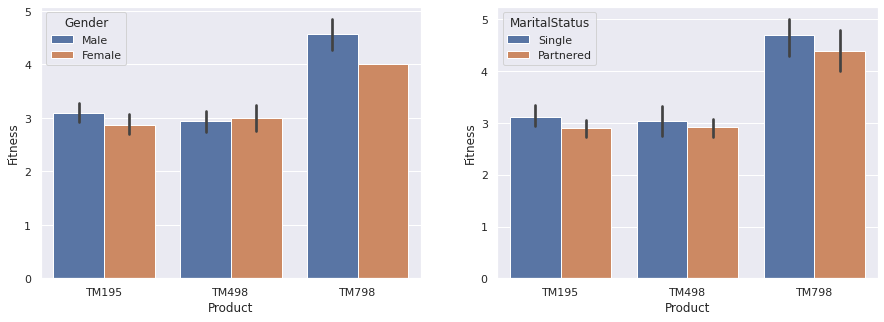

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
sns.barplot(x="Product",y="Fitness",data=df,hue="Gender",ax=axes[0])
sns.barplot(x="Product",y="Fitness",data=df,hue="MaritalStatus",ax=axes[1])

**Observation**
* Customers who bought TM798 are having a higher fitness average rating (around 4 and above)
* Customers who bought the other 2 devices have a close average rating (around 3)

**Product vs Customer Income**

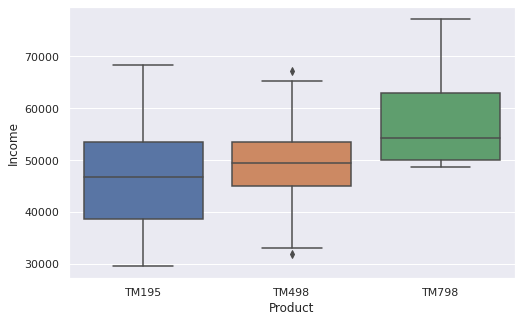

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Product",y="Income", data=df)

**Observation**
* Customer who bought TM798 are having higher income, followed by customers who bought TM498 and TM195 respectively

**Product vs Customer Education Years**

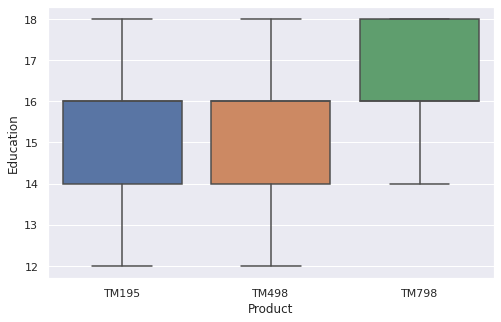

In [ ]:
plt.figure(figsize=(8,5)) 
sns.boxplot(x="Product",y="Education",data=df)

**Observation**
* Customer who bought TM798 are having higher education years than other devices customers.

**Product vs Customer Fitness**

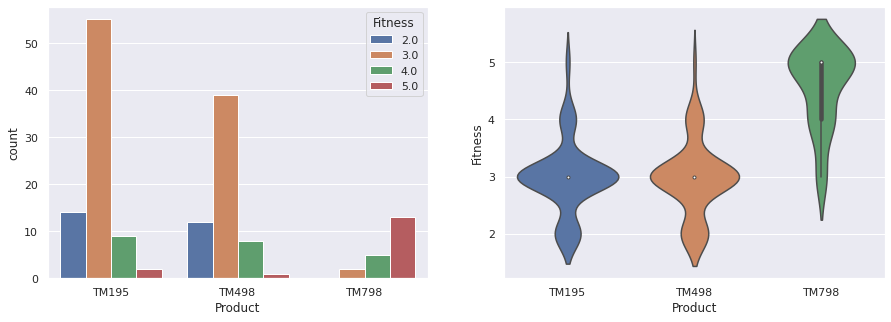

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x="Product",hue="Fitness",data=df,ax=axes[0])
sns.violinplot(y="Fitness", x="Product",data=df,ax=axes[1])


**Observation**
* Majority of customers who bought TM195 and TM498 are having a fitness rating of 3
Majority of customers who bought TM798 are having a fitness rating of 5

**Product vs Customer Expected Miles to Run**

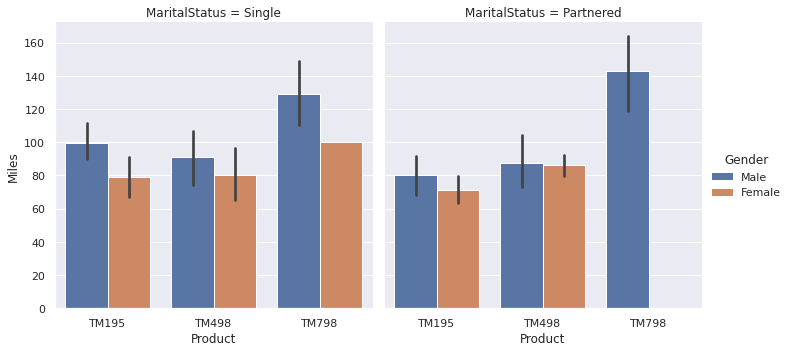

In [ ]:
sns.catplot(x="Product",y="Miles",col="MaritalStatus",data=df,kind="bar",hue="Gender")

**Observation**
* Customers of TM798 is expecting to run more miles per week than other devices customers.
* Male are running more miles irrespective of the machine type and Marital status

## Conclusion 

### Customer Characteristics


* Most of the customers are Males
* Most of the customers Ages is below 30 years old
* Most of customers income are below 60K, and males have more income than females
* Partnered customers are more than single one having the majority in male partnered customers
* Most of the customer education years are below 16 years

### Devices


**TM195**

* It is the most sold device
* Customers of this device are mainly single males and partnered females
* Customer age is between 18 to 33 years old
* Customers income are ranging between 30K and 55K
* Customers education years are between 14 and 16


**TM498**

* It is the second sold device
* Customers of this device are mainly single females and partnered males
* Customer age is between 19 to 34 years old
* Customers income are ranging between 33K and 55K
* Customers education years are between 14 and 16

**TM798**

* It is the least sold device
* Customers of this device are mainly males
* Customer age is between 23 to 30 years old
* Customers income are ranging between 59K and 90K and above.
* Customers education years are between 16 and 18

# Encoding

**One Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'MaritalStatus'])
df.head()

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,TM195,18.0,14.0,3.0,4.0,29562.0,112.0,0,1,0,1
1,TM195,19.0,15.0,2.0,3.0,31836.0,75.0,0,1,0,1
2,TM195,19.0,14.0,4.0,3.0,30699.0,66.0,1,0,1,0
3,TM195,19.0,12.0,3.0,3.0,32973.0,85.0,0,1,0,1
4,TM195,20.0,13.0,4.0,2.0,35247.0,47.0,0,1,1,0
